### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy
import math

In [2]:
%matplotlib inline

## Histogram Equalization ([Wikipedia]())

Histogram equalization is a method in image processing used **for adjusting contrast** in an image using the image's histogram. 

Histogram equalization **usually increases the global contrast** of many images, especially when the image is represented by a narrow range of intensity values. For example, brighter image will have most of the pixels confined to high intensity values and darker images will have most of the pixels confined to lower intensity values. 

Through this adjustment (histogram equalization), the intensities can be better distributed on the histogram utilizing the full range of intensities evenly. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the highly populated intensity values which are used to degrade image contrast. 

<img src="./imgs/histogram_equalization.png">

**<u>Advantages of using Histogram Equalization</u>**
- The method is **useful in images with backgrounds and foregrounds that are both bright or both dark**. In particular, the method can lead to better views of bone structure in x-ray images, and to better detail in photographs that are either over or under-exposed. 
- In face recognition, before training the face data, the images of faces are histogram equalized to make them all with same lighting conditions.
- It is a fairly straightforward technique adaptive to the input image and an **invertible operator**. So in theory, if the histogram equalization function is known, then the original histogram can be recovered. The calculation is not computationally intensive. 
- It is very **useful for scientific images like thermal, satellite or x-ray images**, often the same class of **images to which one would apply false-color**.

**<u>Disdvantages</u>**
- A disadvantage of the method is that **it is indiscriminate**. It may increase the contrast of background noise, while decreasing the usable signal.
- Histogram equalization often produces **unrealistic effects** in photographs.
- Also histogram equalization can produce **undesirable effects** (like visible image gradient) when applied to images with low color depth. For example, if applied to 8-bit image displayed with 8-bit gray-scale palette it will further reduce color depth (number of unique shades of gray) of the image. 
- Histogram equalization will **work the best when applied to images with much higher color depth than palette size**, like continuous data or 16-bit gray-scale images. 

## Global Histogram Equalization ([Docs](https://docs.opencv.org/4.7.0/d5/daf/tutorial_py_histogram_equalization.html))

> The `cv.equalizeHise(src)` function is used for Histogram Equalization of 8 bit single channel images.

- Histogram Equalization of Grayscale Images

In [3]:
hawkes_bay_gray = cv.imread("./imgs/hawkes_bay_unequalized_gray.jpeg", 0)

In [4]:
hawkes_bay_gray_hist_equalized = cv.equalizeHist(hawkes_bay_gray)

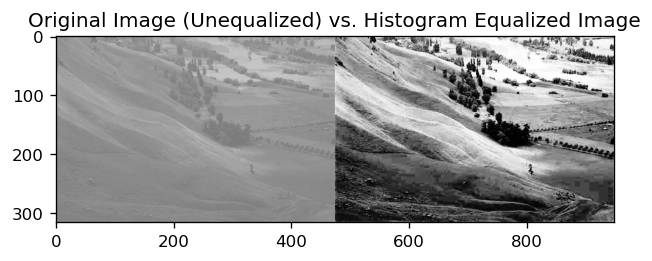

In [5]:
plt.figure(figsize=(6, 4), dpi=120)
plt.imshow(np.hstack((hawkes_bay_gray, hawkes_bay_gray_hist_equalized)), "gray")
plt.title("Original Image (Unequalized) vs. Histogram Equalized Image")
plt.show()

In [6]:
unequalized_hist = cv.calcHist(
    [hawkes_bay_gray], [0], None, histSize=[256], ranges=[0, 256]
)
equalized_hist = cv.calcHist(
    [hawkes_bay_gray_hist_equalized], [0], None, histSize=[256], ranges=[0, 256]
)

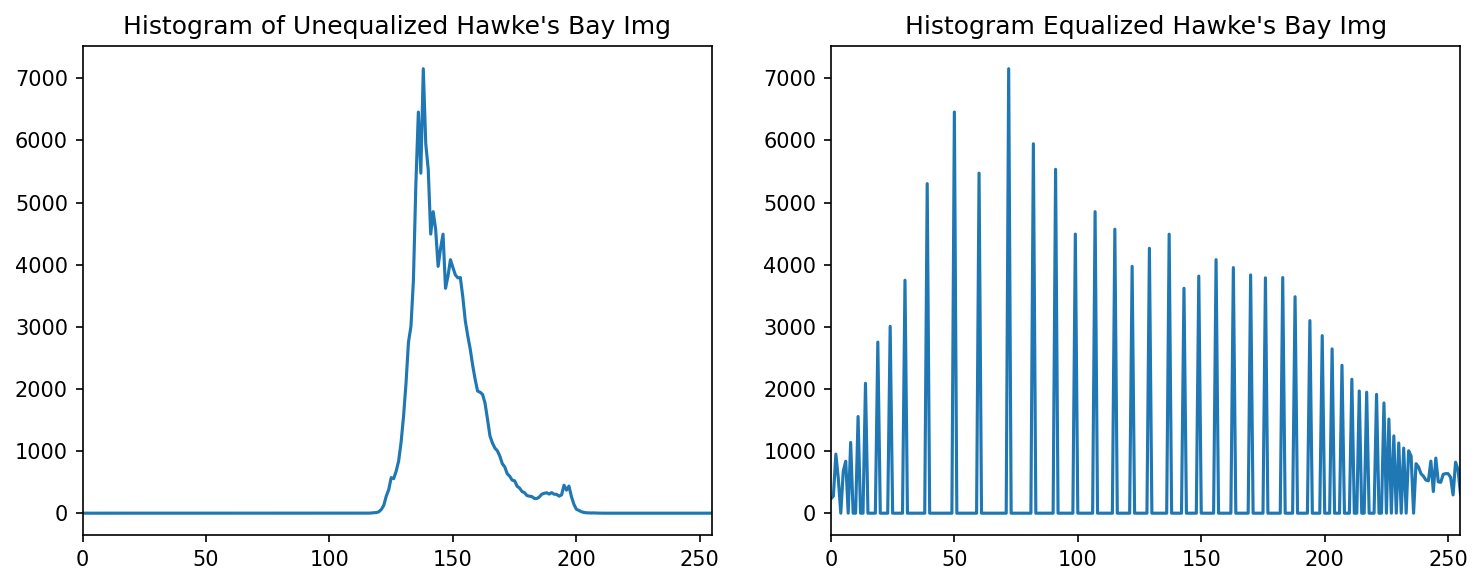

In [7]:
plt.figure(figsize=(10, 4), dpi=150)

plt.subplot(121), plt.plot(unequalized_hist), plt.title(
    "Histogram of Unequalized Hawke's Bay Img"
), plt.xlim(0, 255)
plt.subplot(122), plt.plot(equalized_hist), plt.title(
    "Histogram Equalized Hawke's Bay Img"
), plt.xlim(0, 255)

plt.tight_layout(w_pad=2)
# or, plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

plt.show()

- Histogram Equalization of Color Images ([Stackoverflow Post](https://stackoverflow.com/questions/15007304/histogram-equalization-not-working-on-color-image-opencv))

Histogram equalization is a non-linear process. Channel splitting and equalizing each channel separately is not the proper way for equalization of contrast. 

Equalization involves Intensity values of the image and not the color components. So for a simple RGB color image, Histogram Equalization should not be applied individually on each channel. Rather, it should be applied such that intensity values are equalized without disturbing the color balance of the image. 

1. The first step is to convert the color space of the image from **BGR into** one of the color spaces which separate intensity values from color components. Some of these are: **HSV/HLS, YUV, YCrCb**. **YCrCb is preferred** as it is designed for digital images. 

2. Perform Histogram Equalization of the **intensity plane Y**. 

3. Lastly, convert the image **back to RGB**.

In [8]:
hawkes_bay_greenari = cv.cvtColor(
    cv.imread("./imgs/hawkes_bay_greeneries.jpeg"), cv.COLOR_BGR2RGB
)
hawkes_bay_greenari_ycrcb = cv.split(
    cv.cvtColor(hawkes_bay_greenari, cv.COLOR_RGB2YCrCb)
)

In [9]:
len(hawkes_bay_greenari_ycrcb)

3

In [10]:
hist_equalized_y = cv.equalizeHist(hawkes_bay_greenari_ycrcb[0])
hawkes_bay_greenari_hist_equalized = cv.cvtColor(
    cv.merge(
        [hist_equalized_y, hawkes_bay_greenari_ycrcb[1], hawkes_bay_greenari_ycrcb[2]]
    ),
    cv.COLOR_YCrCb2RGB,
)

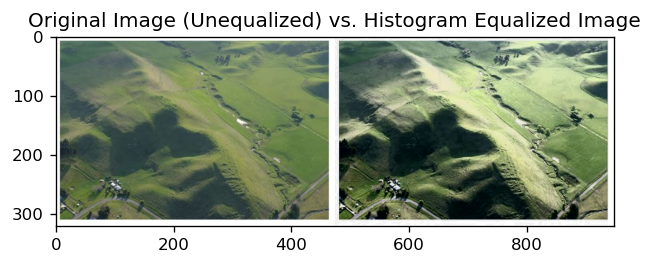

In [11]:
plt.figure(figsize=(6, 4), dpi=120)
plt.imshow(np.hstack((hawkes_bay_greenari, hawkes_bay_greenari_hist_equalized)))
plt.title("Original Image (Unequalized) vs. Histogram Equalized Image")
plt.show()

In [12]:
def color_hist(imgs, img_titles, color_channels=["r", "g", "b"]):
    x = math.ceil(len(imgs) / 2)

    plt.figure(figsize=(10, 4), dpi=150)

    for i, img in enumerate(imgs):
        for c, color in enumerate(color_channels):
            hist_color = cv.calcHist([img], [c], None, histSize=[256], ranges=[0, 256])
            plt.subplot(x, 2, i + 1), plt.plot(hist_color, color=color)

        plt.title(img_titles[i])
        plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()

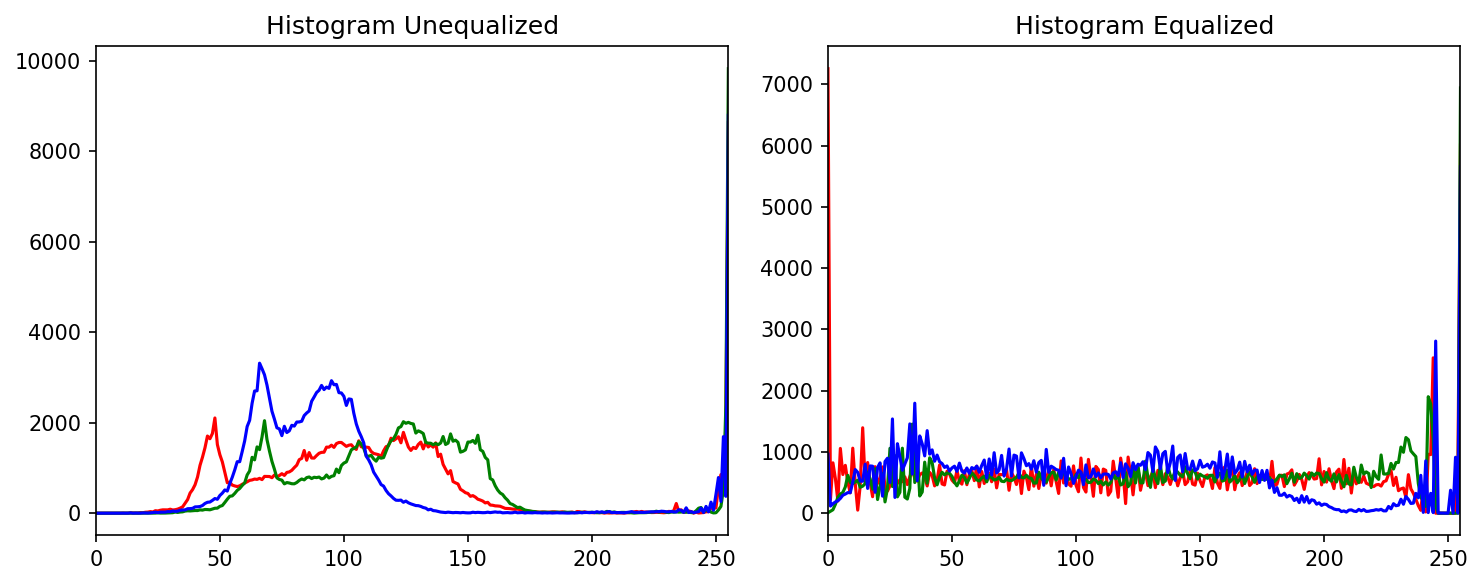

In [13]:
color_hist(
    [hawkes_bay_greenari, hawkes_bay_greenari_hist_equalized],
    ["Histogram Unequalized", "Histogram Equalized"],
)

## CLAHE (Contrast Limited Adaptive Histogram Equalization) 